In [73]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [74]:
def load_json_file(file_path):
	try:
		with open(file_path, 'r') as file:
			data = json.load(file)
		return data
	
	except Exception as e:
		print(f"An error occurred while loading the JSON file: {e}")
		return None

In [75]:
colors = [
	'#e6194B',
	'#f58231',
	'#9A6324',
	'#911eb4',
	'#3cb44b',
	'#f032e6',
	'#4363d8',
  	'#f7cc1d',
]

In [76]:
def plot_one_line(xs, ys, x_label, y_label, label, plot_size=(8, 4), line_color=colors[0], label_size=16, font_size=24, legend_size=16):
	fig, ax1 = plt.subplots(figsize=plot_size)
	
	ax1.plot(xs, ys, color=line_color, label=label, marker='o')

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	# plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [77]:
INPUT = 'YOLOv8-BFA-640-2201600-1300500000.json'
ENERGY_CONSTANT = 1000000

In [78]:
output = load_json_file(INPUT)

num_frame_list = []
fps_avg = []
power_avg = []
fps_std_ratio = []
power_std_ratio = []

In [79]:
for num_frame in list(output.keys()):
	num_frame_int = int(num_frame)
	num_frame_list.append(num_frame_int)
	
	iteration = len(output[num_frame])
	
	latency_list = [iteration_result[0] for iteration_result in output[num_frame][1 : iteration-1]]
	fps_list = list(num_frame_int / np.array(latency_list))

	g_energy_list = [iteration_result[1] for iteration_result in output[num_frame][1 : iteration-1]]
	c_energy_list = [iteration_result[2] for iteration_result in output[num_frame][1 : iteration-1]]
	e_energy_list = [iteration_result[3] for iteration_result in output[num_frame][1 : iteration-1]]
	power_list = list((np.array(g_energy_list) + np.array(c_energy_list) + np.array(e_energy_list)) / np.array(latency_list) / ENERGY_CONSTANT)

	fps_avg.append(np.average(np.array(fps_list)))
	power_avg.append(np.average(np.array(power_list)))

	fps_std_ratio.append(np.std(np.array(fps_list)) / np.average(np.array(fps_list)))
	power_std_ratio.append(np.std(np.array(power_list)) / np.average(np.array(power_list)))

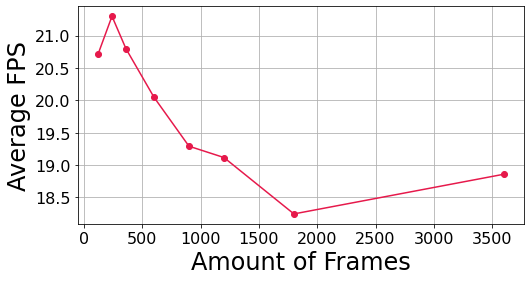

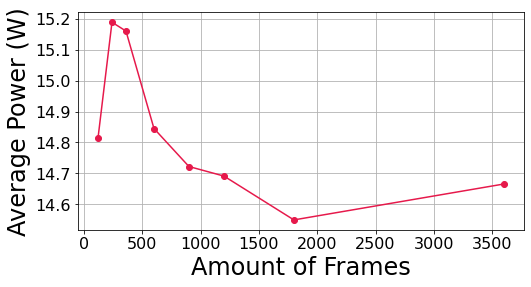

In [80]:
plot_one_line(num_frame_list, fps_avg, 'Amount of Frames', 'Average FPS', '')
plot_one_line(num_frame_list, power_avg, 'Amount of Frames', 'Average Power (W)', '')

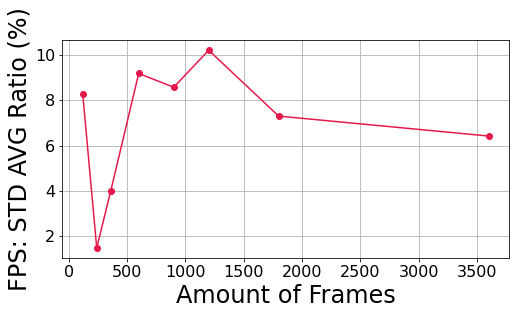

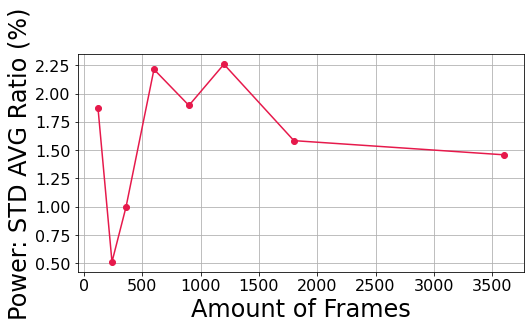

In [81]:
plot_one_line(num_frame_list, list(np.array(fps_std_ratio) * 100), 'Amount of Frames', 'FPS: STD AVG Ratio (%)', '')
plot_one_line(num_frame_list, list(np.array(power_std_ratio) * 100), 'Amount of Frames', 'Power: STD AVG Ratio (%)', '')